In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
def dijkstra_with_visualization(graph, start_vertex):
    # Inicjalizacja słownika odległości dla każdego wierzchołka w grafie z nieskończonością.
    distances = {vertex: float('infinity') for vertex in graph}
    # Ustawienie odległości od wierzchołka startowego do samego siebie na 0.
    distances[start_vertex] = 0
    # Tworzenie kolejki priorytetowej i dodanie pary (odległość, wierzchołek) dla wierzchołka startowego.
    priority_queue = [(0, start_vertex)]
    # Ustalenie pozycji wierzchołków grafu za pomocą algorytmu spring_layout.
    pos = nx.spring_layout(graph)
    # Pobranie etykiet wag krawędzi grafu.
    labels = nx.get_edge_attributes(graph, 'weight')
    # Licznik kroków do śledzenia postępu algorytmu.
    steps = 0

    # Lista do przechowywania wygenerowanych figur wizualizacji.
    figs = []

    # Główna pętla algorytmu, działa dopóki kolejka priorytetowa nie jest pusta.
    while priority_queue:
        # Pobieranie wierzchołka z najmniejszą odległością z kolejki.
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        # Kontynuacja tylko w przypadku, gdy pobrana odległość nie jest większa od zapisanej w distances.
        if current_distance > distances[current_vertex]:
            continue
        
        # Wizualizacja aktualnego stanu grafu.
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        node_colors = ['lightgreen' if vertex == current_vertex else 'skyblue' for vertex in graph.nodes()]
        nx.draw(graph, pos, ax=ax1, node_color=node_colors, with_labels=True, node_size=700, edge_color='gray')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, ax=ax1)
        ax1.set_title(f"Step {steps}: Exploring {current_vertex}")
        
        # Wizualizacja macierzy odległości w tabeli.
        dist_df = pd.DataFrame.from_dict(distances, orient='index', columns=['Distance'])
        ax2.axis('tight')
        ax2.axis('off')
        ax2.table(cellText=dist_df.values, colLabels=dist_df.columns, rowLabels=dist_df.index, cellLoc='center', loc='center')
        ax2.set_title("Current Distances")
        
        # Dodanie wygenerowanej figury do listy.
        figs.append(fig)

        # Przetwarzanie sąsiadujących wierzchołków.
        for neighbor in graph[current_vertex]:
            weight = graph[current_vertex][neighbor]['weight']
            distance = current_distance + weight

            # Aktualizacja odległości, jeśli znaleziono krótszą ścieżkę.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
        
        # Inkrementacja licznika kroków.
        steps += 1

    # Zwrócenie finalnych odległości i listy figur zawierających wizualizacje krok po kroku.
    return distances, figs

In [3]:
# Definicja grafu i uruchomienie wizualizacji
G = nx.DiGraph()
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=4)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=1)

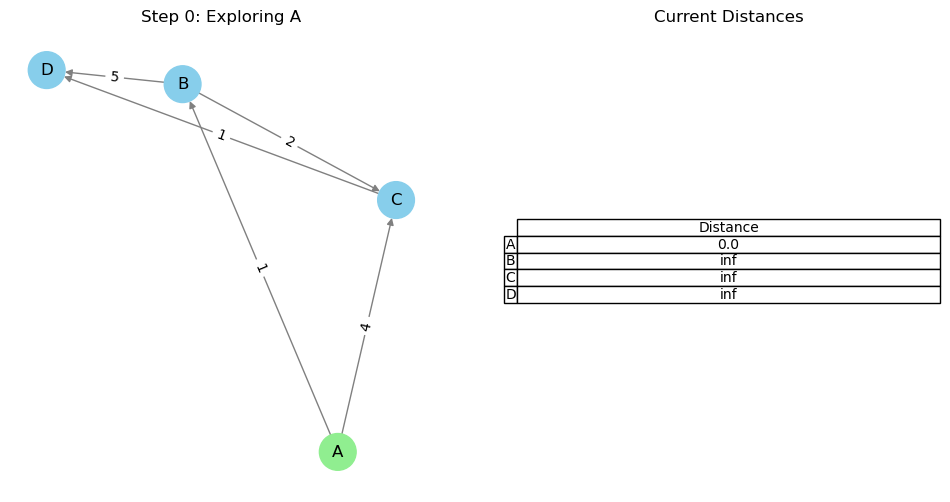

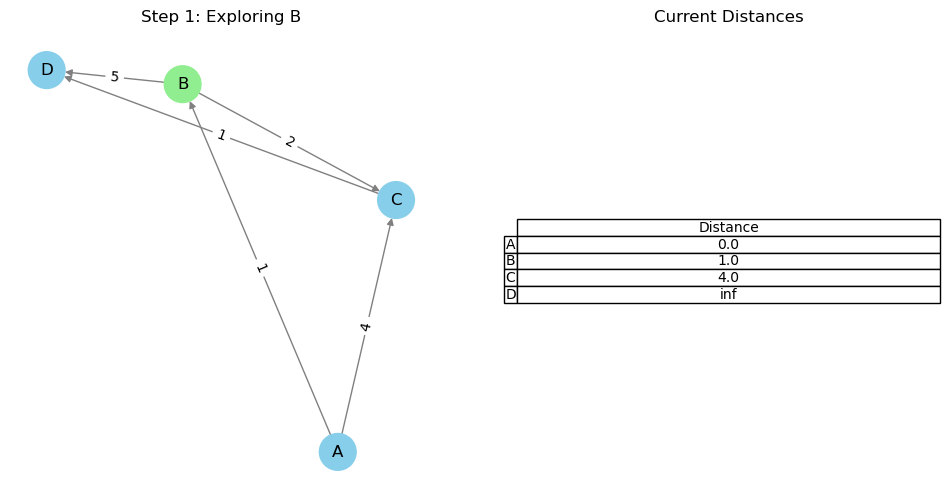

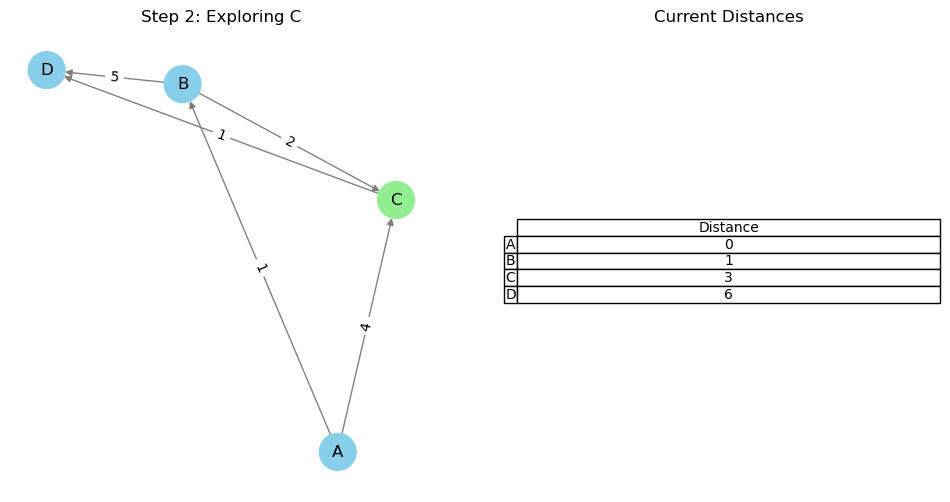

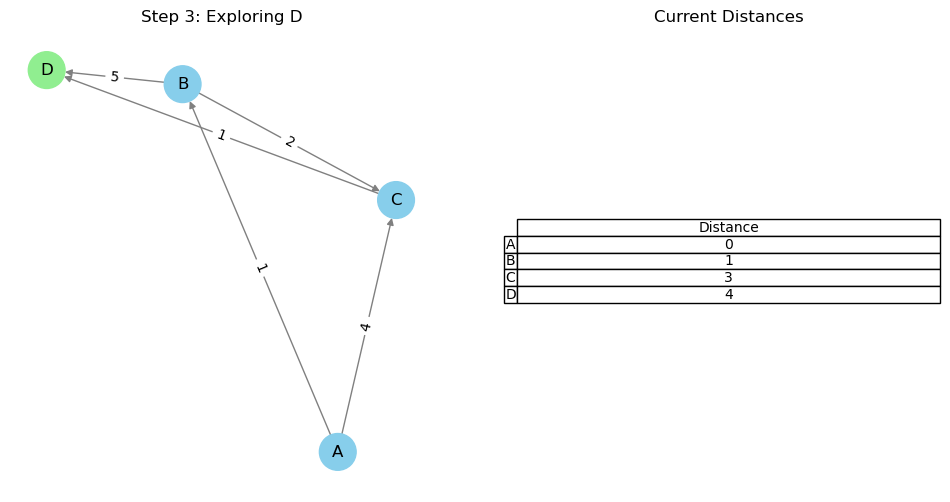

In [4]:
distances, figures = dijkstra_with_visualization(G, 'A')

In [5]:
# Wyświetlenie końcowych wyników dystansów
print(distances)

{'A': 0, 'B': 1, 'C': 3, 'D': 4}


Bellmana-Forda-Moor

In [6]:
def bellman_ford_with_visualization(graph, start_vertex):
    # Inicjalizacja odległości
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start_vertex] = 0
    pos = nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    steps = 0
    figs = []

    # Relaksowanie krawędzi
    for i in range(len(graph) - 1):  # Powtarzamy n-1 razy dla n wierzchołków
        for u, v, data in graph.edges(data=True):
            if distances[u] + data['weight'] < distances[v]:
                distances[v] = distances[u] + data['weight']
                
                # Aktualizacja wykresu grafu
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
                node_colors = ['lightgreen' if vertex == v else 'skyblue' for vertex in graph.nodes()]
                nx.draw(graph, pos, ax=ax1, node_color=node_colors, with_labels=True, node_size=700, edge_color='gray')
                nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, ax=ax1)
                ax1.set_title(f"Step {steps + i}: Relaxing edge {u}-{v}")

                # Wizualizacja macierzy odległości
                dist_df = pd.DataFrame.from_dict(distances, orient='index', columns=['Distance'])
                ax2.axis('tight')
                ax2.axis('off')
                ax2.table(cellText=dist_df.values, colLabels=dist_df.columns, rowLabels=dist_df.index, cellLoc='center', loc='center')
                ax2.set_title("Current Distances")
                
                figs.append(fig)  # Dodanie figury do listy
                steps += 1

    # Sprawdzenie na obecność cyklu ujemnego
    for u, v, data in graph.edges(data=True):
        if distances[u] + data['weight'] < distances[v]:
            print("Graph contains a negative weight cycle")
            return None, None

    return distances, figs

In [7]:
# Definicja grafu i uruchomienie wizualizacji
G = nx.DiGraph()
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=4)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=1)

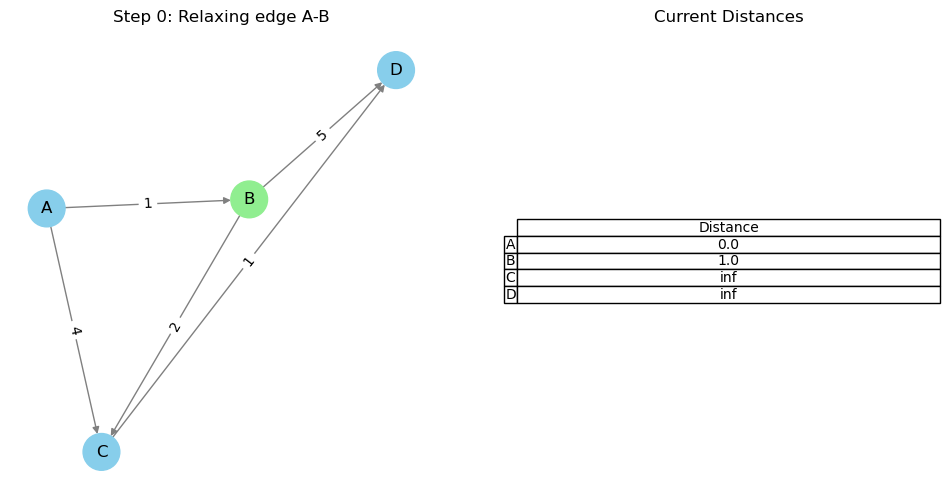

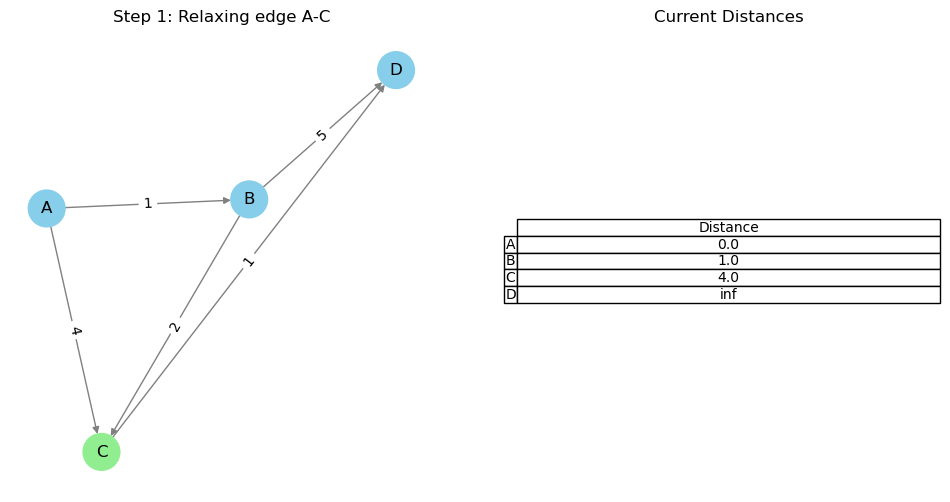

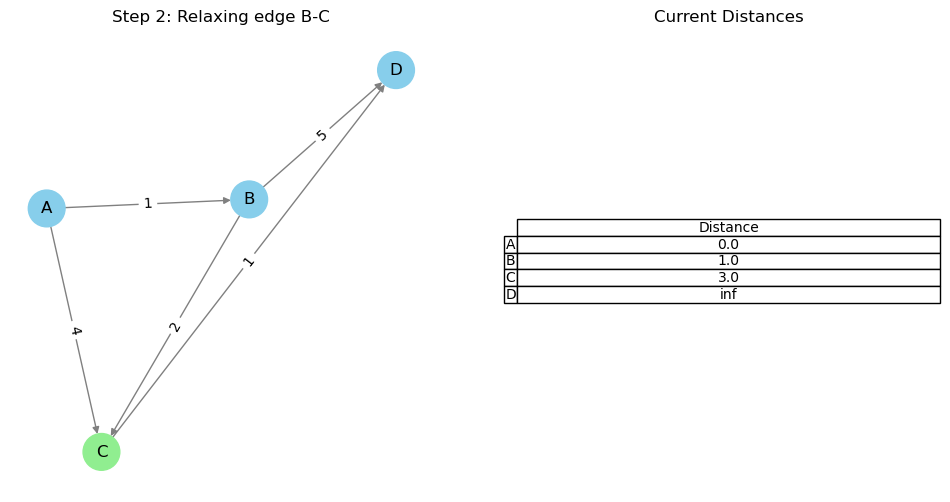

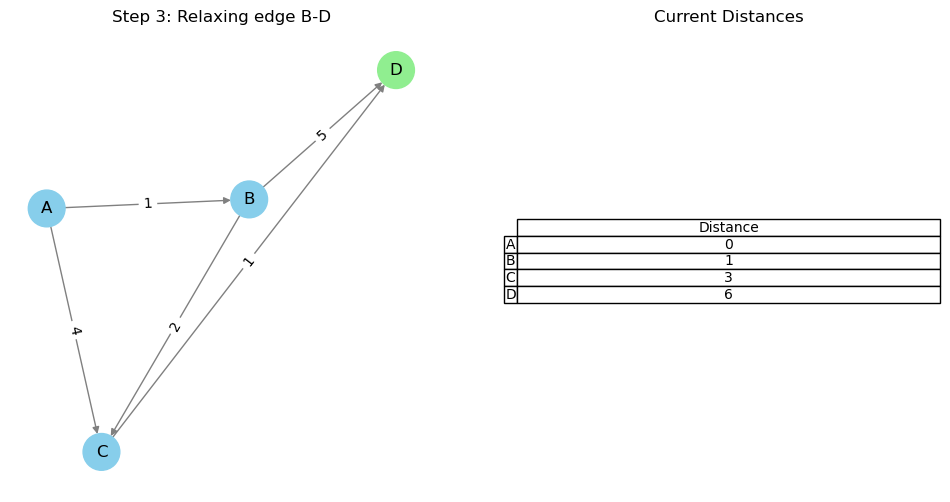

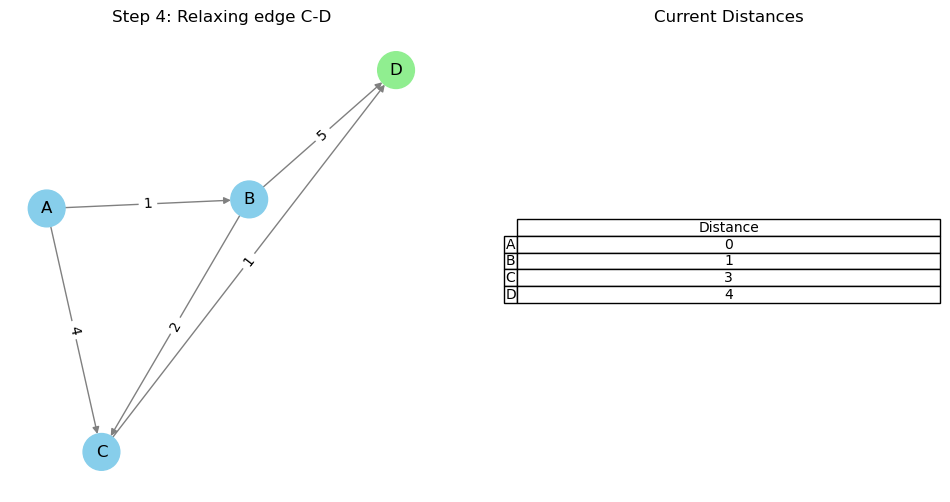

In [8]:
distances, figures = bellman_ford_with_visualization(G, 'A')

In [9]:
# Wyświetlenie końcowych wyników dystansów, jeśli są dostępne
if distances:
    print(distances)

{'A': 0, 'B': 1, 'C': 3, 'D': 4}


In [10]:
# Definicja grafu i uruchomienie wizualizacji
G = nx.DiGraph()
G.add_edge('S', 'A', weight=10)
G.add_edge('S', 'E', weight=8)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'A', weight=1)
G.add_edge('C', 'B', weight=-2)
G.add_edge('D', 'A', weight=-4)
G.add_edge('D', 'C', weight=-1)
G.add_edge('E', 'D', weight=-1)

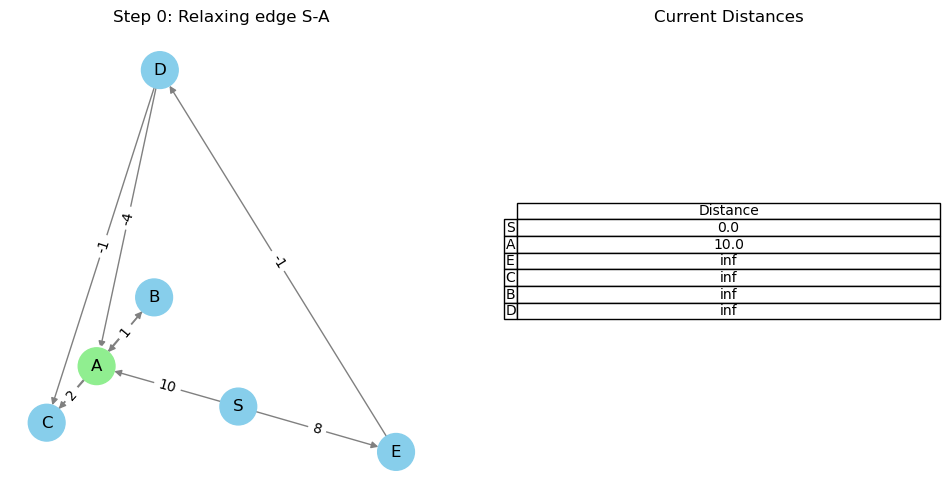

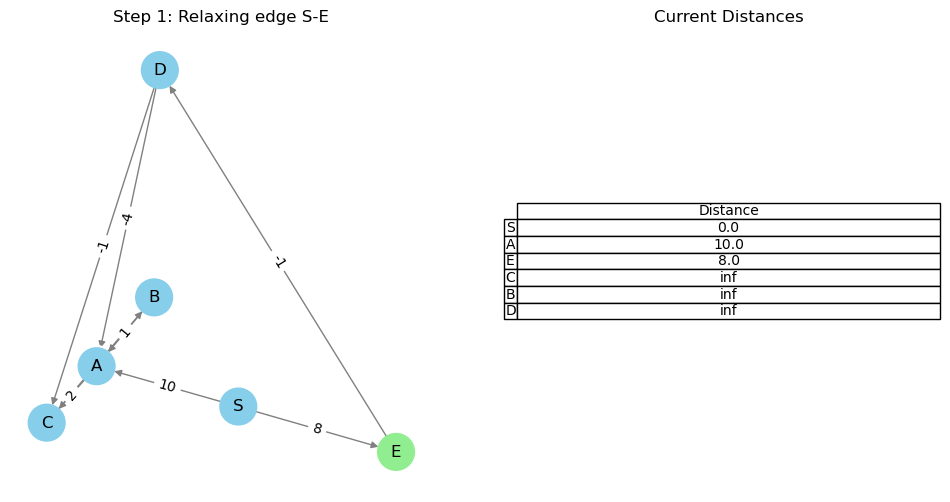

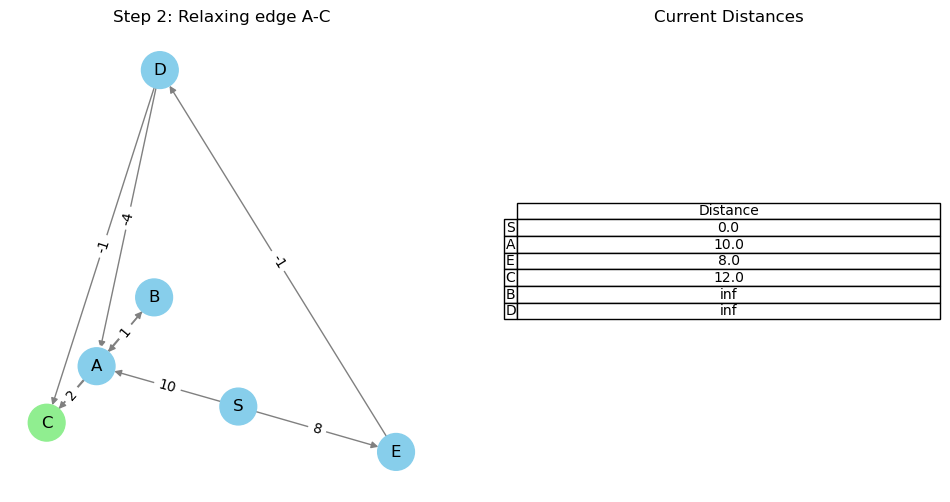

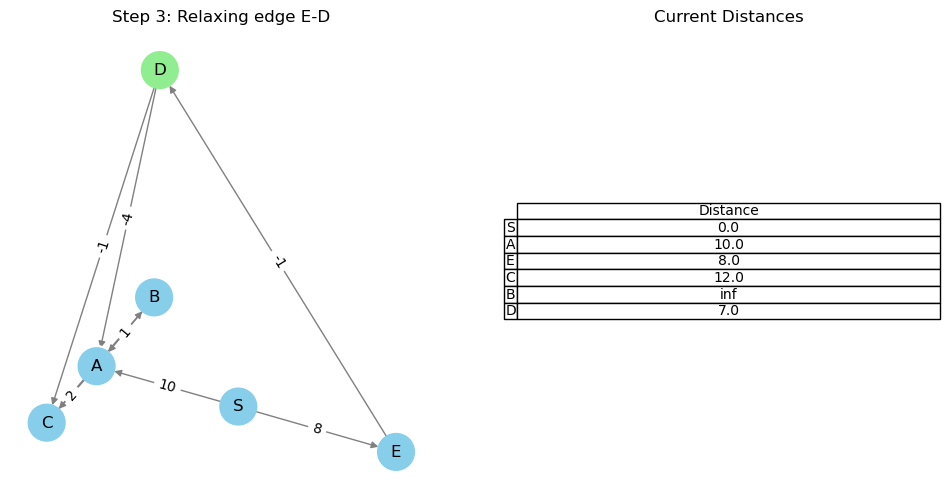

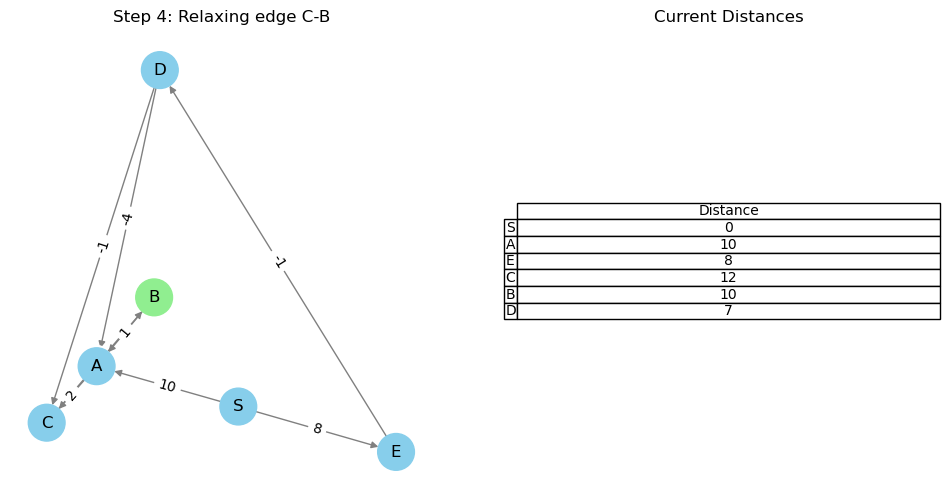

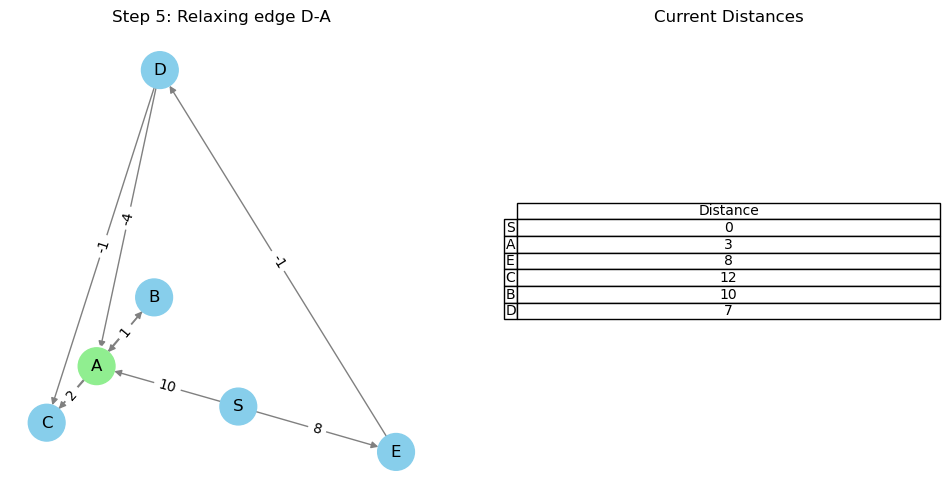

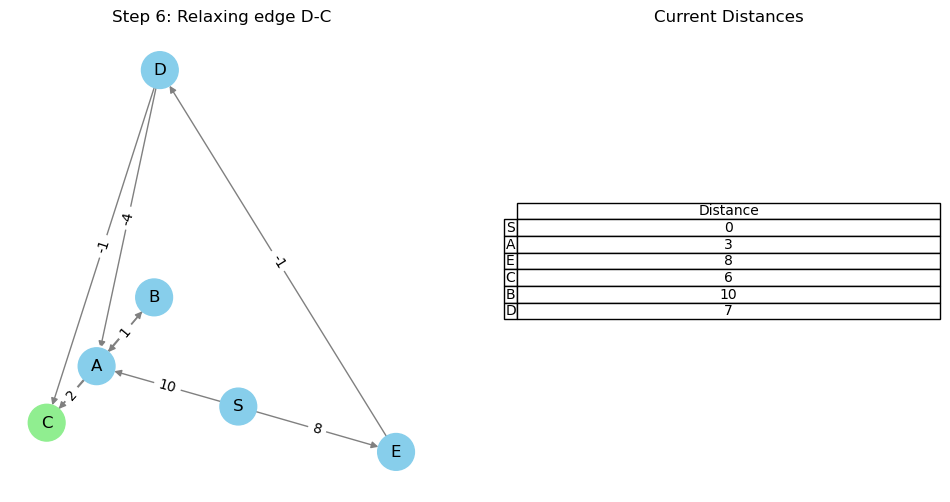

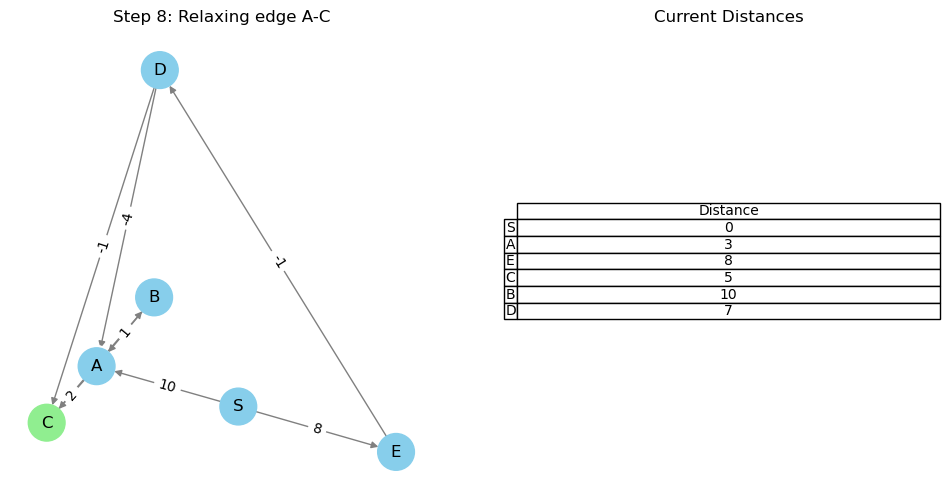

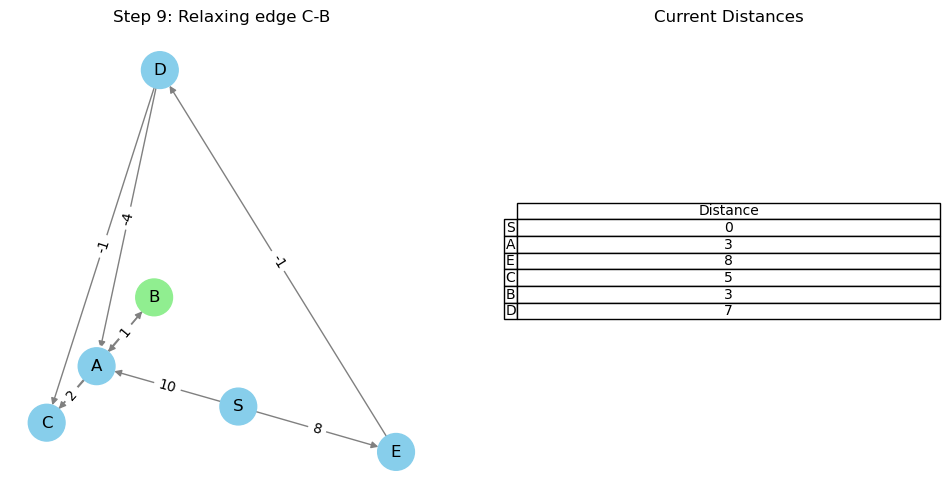

In [11]:
distances, figures = bellman_ford_with_visualization(G, 'S')

In [12]:
# Wyświetlenie końcowych wyników dystansów, jeśli są dostępne
if distances:
    print(distances)

{'S': 0, 'A': 3, 'E': 8, 'C': 5, 'B': 3, 'D': 7}
